In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class Value:
    
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad= 0.0
        self._backward = lambda : None
        self._prev= set(_children)
        self._op = _op
        self.label= label
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out= Value(self.data+ other.data, (self,other), '+')
        
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward
        return out
    
    def __mul__(self, other):
        out= Value(self.data*other.data, (self, other), '*')
        
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward= _backward
        
        return out
    
    def tanh(self):
        x= self.data
        t = (math.exp(2*x)-1)/(math.exp(2*x)+1)
        out = Value(t, (self,), 'tanh')
        
        def _backward():
            self.grad += (1- t**2) * out.grad
        out._backward = _backward
        return out
    
    def backward(self):
        
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)
        
        self.grad= 1.0
        for node in reversed(topo):
            node._backward()
        
        
a = Value(2.0, label='a')
b= Value(-3.0, label='b')
c= Value(10.0, label = 'c')
e = a*b; e.label='e'
d= e + c; d.label='d'
f = Value(-2.0, label='f')
L = d*f; L.label= 'L'
L

Value(data=-8.0)

In [3]:
d._prev

{Value(data=-6.0), Value(data=10.0)}

In [4]:
#Let's make to functions to visualize the network
from graphviz import Digraph

def trace(root):
    
    nodes, edges= set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child,v))
                build(child)
    build(root)
    return nodes, edges


def draw_dot(root):
    dot= Digraph(format='svg', graph_attr={'rankdir':'LR'})#LR= left to right
                 
    nodes, edges= trace(root)
    for n in nodes:
        uid= str(id(n))
        dot.node(name= uid, label= "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=uid + n._op, label = n._op)
            dot.edge(uid+ n._op, uid)
            
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2))+ n2._op)
                 
    return dot

This is the Forward pass


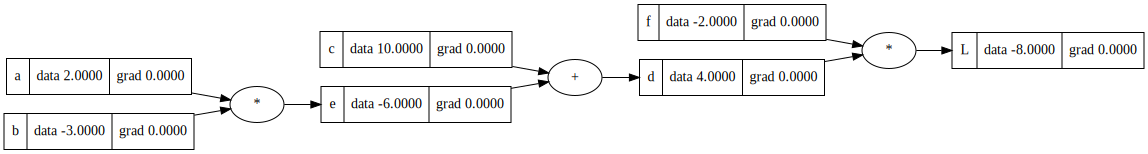

In [5]:
print('This is the Forward pass')
draw_dot(L)


In [6]:
#Let's make the backpropagation manually
L.grad = 1.0
f.grad=4.0
d.grad= -2.0
c.grad= -2.0
e.grad= -2.0
a.grad= -2.0 * -3.0
b.grad= -2.0 * 2.0


In [7]:
#Lets'make te function to visualize the derivate
def lol():
    
    h = 0.001
    a = Value(2.0, label='a')
    b= Value(-3.0, label='b')
    c= Value(10.0, label = 'c')
    e = a*b; e.label='e'
    d= e + c; d.label='d'
    f = Value(-2.0, label='f')
    L = d*f; L.label= 'L'
    L1 = L.data
    
    a = Value(2.0+ h, label='a')
    b= Value(-3.0, label='b')
    c= Value(10.0, label = 'c')
    e = a*b; e.label='e'
    d= e + c; d.label='d'
    f = Value(-2.0, label='f')
    L = d*f; L.label= 'L'
    L2 = L.data
    
    print((L2-L1)/h)
lol()

6.000000000000227


In [8]:
#Let's update manually our data

a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

e = a*b
d= e + c
L = d*f

print(L.data)

-7.286496


In [ ]:
#Now let's make the backpropagation

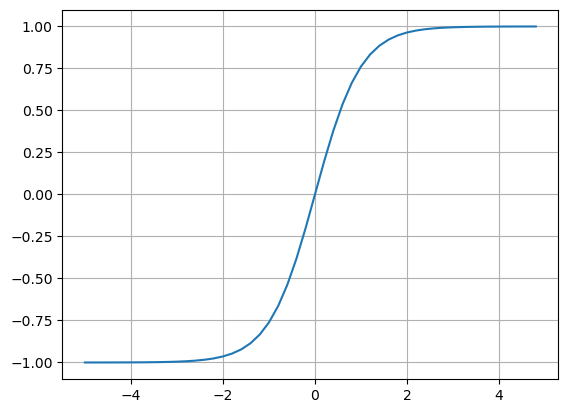

In [9]:
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2))); plt.grid();
#this is the tan-h, an iperbolic function

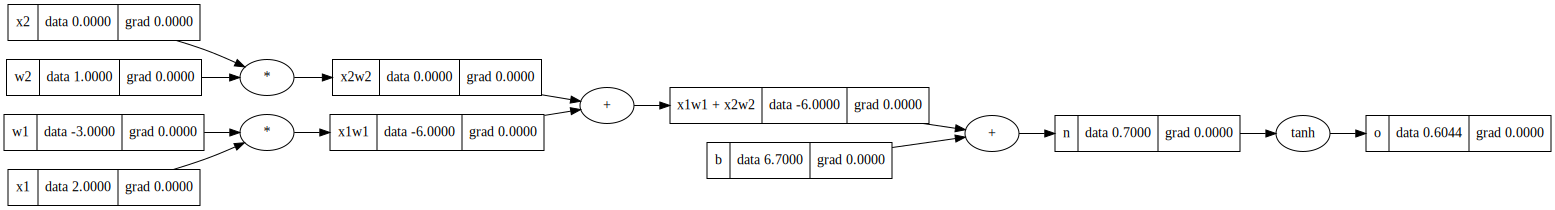

In [10]:
#inputs
x1 = Value( 2.0, label = 'x1')
x2 = Value( 0.0, label = 'x2')
#weights
w1 = Value( -3.0, label = 'w1')
w2 = Value( 1.0, label = 'w2')
#bias
b = Value( 6.7, label = 'b')
#x1w1 + x2w2 + b
x1w1 = x1*w1; x1w1.label= 'x1w1'
x2w2 = x2*w2; x2w2.label='x2w2'
x1w1x2w2= x1w1 + x2w2; x1w1x2w2.label= 'x1w1 + x2w2'
n = x1w1x2w2 + b; n.label = 'n'

#We couldn't use the tanh with our n because it is impemented only for exponential computation and divisions

#Look at the tan-h function in the class Value
o = n.tanh(); o.label = 'o'
draw_dot(o)
#We can see that is squashes the data. Growing up the bias would make grow the squash

In [11]:
#Now let's change the data and put a different Bias
#inputs
x1 = Value( 2.0, label = 'x1')
x2 = Value( 0.0, label = 'x2')
#weights
w1 = Value( -3.0, label = 'w1')
w2 = Value( 1.0, label = 'w2')
#bias
b = Value( 6.8813735870195432, label = 'b')
#x1w1 + x2w2 + b
x1w1 = x1*w1; x1w1.label= 'x1w1'
x2w2 = x2*w2; x2w2.label='x2w2'
x1w1x2w2= x1w1 + x2w2; x1w1x2w2.label= 'x1w1 + x2w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

In [12]:
#Let's make the backprop manually
o.grad = 1.0
n.grad = 0.5


x1w1x2w2.grad = 0.5
b.grad = 0.5

x1w1.grad = 0.5
x2w2.grad = 0.5


x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad

x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad

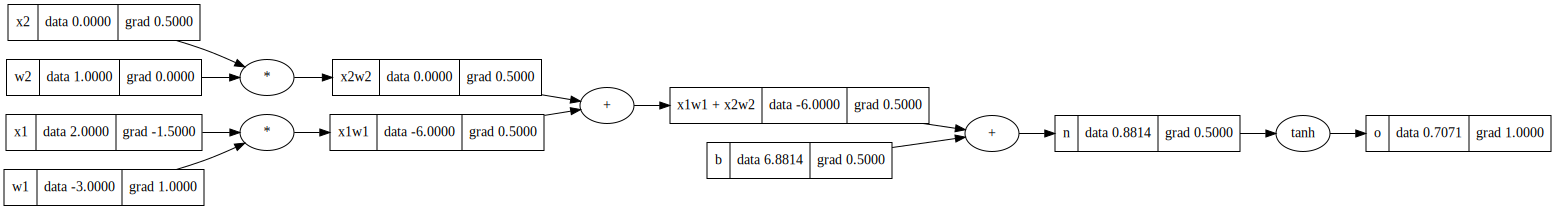

In [13]:
draw_dot(o)

In [ ]:
#x2 and w2 don't influence our output so to optimize it we have to update x1 and w1

In [14]:
#Put the gradient of o to 1 because it's where we want to start our backward function
o.grad= 1.0

In [15]:
o._backward()
n._backward()
b._backward() #leaf node
x1w1x2w2._backward()
x1w1._backward()
x2w2._backward()
#But now we have still called the function manually for every node
#So let's make it automatically

In [16]:
#Let's implement the topological sort
topo = []
visited = set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)
build_topo(o)
topo

#Now I just have to call the .backward function of every node in this topological order

[Value(data=6.881373587019543),
 Value(data=2.0),
 Value(data=-3.0),
 Value(data=-6.0),
 Value(data=0.0),
 Value(data=1.0),
 Value(data=0.0),
 Value(data=-6.0),
 Value(data=0.8813735870195432),
 Value(data=0.7071067811865476)]

In [ ]:
""""
This would have been the function to make not call the backward manually but I implemented it already in the class Value
o.grad = 1.0

for node in reversed(topo):
    node._backward()


o.backward()
"""
